# Dandiset 001366 Exploration Notebook

This notebook provides an introduction to Dandiset 001366: "Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification".

**Important Note**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Exercise caution when interpreting the code or results.

## Dataset Description

The dataset contains movies of pial vessels in mice, focused on vessel diameter and pulsatility quantification. Key metadata:
- **Species**: Mus musculus (mouse)
- **Experiment**: Vessel diameter and pulsatility measurement
- **Institution**: University of Copenhagen
- **License**: CC-BY-4.0

The NWB files contain 16-bit grayscale movies of pial vessels at ~54.47Hz.

In [1]:
# List all assets in the Dandiset
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001366")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets:")
for asset in assets:
    print(f"- {asset.path} ({asset.size/1e6:.1f} MB)")

Found 2 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (408.1 MB)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (2377.8 MB)


## Loading and Exploring NWB Data

We'll examine one of the NWB files containing vessel movies. First, let's load the required packages:

In [2]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np

Now we'll load the NWB file and examine its contents:

In [3]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file(
    "https://lindi.neurosift.org/dandi/dandisets/001366/assets/71fa07fc-4309-4013-8edd-13213a86a67d/nwb.lindi.json"
)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Display basic information
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Frame rate: {nwb.acquisition['Movies'].rate} Hz")

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Subject ID: F15
Frame rate: 54.47 Hz


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualizing Sample Frames

Let's examine sample frames from the movie acquisition:

Movie shape: (9553, 214, 132) (frames × height × width)
Total duration: 175.4 seconds


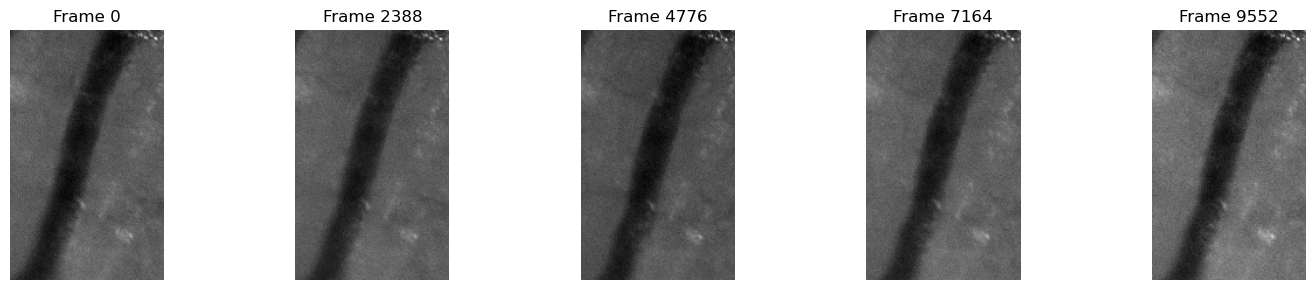

In [4]:
# Get the Movies acquisition
movies = nwb.acquisition["Movies"]
print(f"Movie shape: {movies.data.shape} (frames × height × width)")
print(f"Total duration: {movies.data.shape[0]/movies.rate:.1f} seconds")

# Plot sample frames
sample_indices = np.linspace(0, movies.data.shape[0]-1, 5, dtype=int)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, idx in enumerate(sample_indices):
    frame = movies.data[idx]
    axes[i].imshow(frame, cmap='gray')
    axes[i].set_title(f"Frame {idx}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## Notes on Analysis

When working with this data:
- The movie shows pial vessel dynamics at high temporal resolution (~54.47Hz)
- For quantitative analysis, consider:
  - Vessel boundary detection algorithms
  - Frame-to-frame intensity variations
  - Temporal filtering to isolate pulsation components
- Be mindful of data size when loading frames - work with subsets when possible

## Next Steps

Potential analyses to explore:
1. Vessel diameter quantification across frames
2. Pulsatility index calculation
3. Comparison of different vessel segmentation methods

Remember that proper statistical analysis would require:
- Multiple samples/conditions
- Appropriate normalization
- Validation against ground truth measurements